In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("dataset.csv") 

In [3]:
df.head()

,Task ID,Task Name,Description,Priority,Status,Due Date,Assigned To,Created By,Creation Date,Last Updated,...,Blockers,Risk Level,Risk Description,Resolution Plan,Notifications Enabled,Reminder Date,Color Code,Custom Field 1,Custom Field 2,Unnamed: 30
0,TASK026,Update Project Timeline,Revise the project schedule based on recent pr...,High,In Progress,29-04-2025,John Doe,Jane Smith,18-04-2025,21-04-2025,...,NaN,Medium,Potential slippage due to deployment issues.,Re-evaluate dependencies and allocate buffer t...,Yes,27-04-2025,#FF8A65,Milestone Review,Gantt Chart Updated,NaN
1,TASK027,Develop User Profile Page,Implement the frontend and backend logic for u...,High,In Progress,05-05-2025,Alice Brown,Bob Green,18-04-2025,22-04-2025,...,NaN,Low,Minor UI alignment issues.,Address during final testing.,Yes,03-05-2025,#4CAF50,Sprint 4,Data Validation Required,NaN
2,TASK028,Run A/B Tests on Landing Page,Experiment with different versions of the land...,Medium,To Do,12-05-2025,Jane Smith,Charlie White,18-04-2025,NaN,...,landing_page_variants.pdf,NaN,Medium,Traffic volume might affect test duration.,Ensure sufficient traffic before concluding te...,Yes,10-05-2025,#00BCD4,Conversion Optimization,Hypothesis 1
3,TASK029,Implement Role-Based Access Control,Secure the application by implementing differe...,High,To Do,19-05-2025,Bob Green,David Black,18-04-2025,NaN,...,rbac_design.docx,NaN,High,Potential security vulnerabilities if not impl...,Thorough testing and code review required.,Yes,17-05-2025,#F44336,Authorization,Permissions Matrix
4,TASK030,Create API Documentation (v2),Update the API documentation to reflect the la...,Low,In Progress,26-05-2025,Charlie White,Eve Grey,18-04-2025,23-04-2025,...,NaN,Low,Keeping documentation up-to-date with developm...,Automate documentation generation where possible.,Yes,24-05-2025,#9E9E9E,API Reference,Version 2,NaN


DATA CLEANING

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Task ID                   55 non-null     object 
 1   Task Name                 55 non-null     object 
 2   Description               55 non-null     object 
 3   Priority                  55 non-null     object 
 4   Status                    55 non-null     object 
 5   Due Date                  55 non-null     object 
 6   Assigned To               55 non-null     object 
 7   Created By                55 non-null     object 
 8   Creation Date             55 non-null     object 
 9   Last Updated              14 non-null     object 
 10  Tags                      11 non-null     object 
 11  Dependencies              53 non-null     object 
 12  Estimated Effort (Hours)  55 non-null     float64
 13  Actual Effort (Hours)     55 non-null     float64
 14  Completion P

Task ID                      1
Task Name                    1
Description                  1
Priority                     1
Status                       1
Due Date                     1
Assigned To                  1
Created By                   1
Creation Date                1
Last Updated                42
Tags                        45
Dependencies                 3
Estimated Effort (Hours)     1
Actual Effort (Hours)        1
Completion Percentage       47
Notes                        1
Category                    21
Sub-Category                 1
Location                     1
Meeting Link                10
Attachments                 27
Blockers                    10
Risk Level                  27
Risk Description             1
Resolution Plan              1
Notifications Enabled       21
Reminder Date               21
Color Code                  21
Custom Field 1              21
Custom Field 2              21
Unnamed: 30                 30
dtype: int64

In [5]:
drop_cols = [
    'Meeting Link', 'Attachments','Blockers','Color Code']
df.drop(columns=drop_cols, inplace=True)

In [6]:
df.head()

,Task ID,Task Name,Description,Priority,Status,Due Date,Assigned To,Created By,Creation Date,Last Updated,...,Sub-Category,Location,Risk Level,Risk Description,Resolution Plan,Notifications Enabled,Reminder Date,Custom Field 1,Custom Field 2,Unnamed: 30
0,TASK026,Update Project Timeline,Revise the project schedule based on recent pr...,High,In Progress,29-04-2025,John Doe,Jane Smith,18-04-2025,21-04-2025,...,Scheduling,Online,Medium,Potential slippage due to deployment issues.,Re-evaluate dependencies and allocate buffer t...,Yes,27-04-2025,Milestone Review,Gantt Chart Updated,NaN
1,TASK027,Develop User Profile Page,Implement the frontend and backend logic for u...,High,In Progress,05-05-2025,Alice Brown,Bob Green,18-04-2025,22-04-2025,...,User Accounts,Local,Low,Minor UI alignment issues.,Address during final testing.,Yes,03-05-2025,Sprint 4,Data Validation Required,NaN
2,TASK028,Run A/B Tests on Landing Page,Experiment with different versions of the land...,Medium,To Do,12-05-2025,Jane Smith,Charlie White,18-04-2025,NaN,...,Marketing,Web Optimization,NaN,Medium,Traffic volume might affect test duration.,Ensure sufficient traffic before concluding te...,Yes,#00BCD4,Conversion Optimization,Hypothesis 1
3,TASK029,Implement Role-Based Access Control,Secure the application by implementing differe...,High,To Do,19-05-2025,Bob Green,David Black,18-04-2025,NaN,...,Development,Security,NaN,High,Potential security vulnerabilities if not impl...,Thorough testing and code review required.,Yes,#F44336,Authorization,Permissions Matrix
4,TASK030,Create API Documentation (v2),Update the API documentation to reflect the la...,Low,In Progress,26-05-2025,Charlie White,Eve Grey,18-04-2025,23-04-2025,...,Technical,Online,Low,Keeping documentation up-to-date with developm...,Automate documentation generation where possible.,Yes,24-05-2025,API Reference,Version 2,NaN


In [8]:
date_cols = ['Due Date', 'Creation Date', 'Last Updated', 'Reminder Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\swapnil\AppData\Local\Temp\ipykernel_26228\559617079.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\swapnil\AppData\Local\Temp\ipykernel_26228\559617079.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\swapnil\AppData\Local\Temp\ipykernel_26228\559617079.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\swapnil\AppData\Local\Temp\ipykernel_26228\559617079.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was sp

In [9]:
# 📅 For date columns, fill with the earliest date or a placeholder
for col in date_cols:
    df[col].fillna(pd.Timestamp("2025-01-01"), inplace=True)  # You can customize this

In [10]:
df['Days_Until_Due'] = (df['Due Date'] - df['Creation Date']).dt.days

Label ENCODER

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [12]:
df = df.dropna(subset=['Completion Percentage'])  # Drop if target is missing

df.fillna(0, inplace=True)  # Fill remaining missing with 0

In [13]:
print(df.dtypes)
print(df.isnull().sum())

Task ID                              int32
Task Name                            int32
Description                          int32
Priority                             int32
Status                               int32
Due Date                    datetime64[ns]
Assigned To                          int32
Created By                           int32
Creation Date               datetime64[ns]
Last Updated                datetime64[ns]
Tags                                 int32
Dependencies                         int32
Estimated Effort (Hours)           float64
Actual Effort (Hours)              float64
Completion Percentage              float64
Notes                                int32
Category                             int32
Sub-Category                         int32
Location                             int32
Risk Level                           int32
Risk Description                     int32
Resolution Plan                      int32
Notifications Enabled                int32
Reminder Da

In [14]:
df.head()

,Task ID,Task Name,Description,Priority,Status,Due Date,Assigned To,Created By,Creation Date,Last Updated,...,Location,Risk Level,Risk Description,Resolution Plan,Notifications Enabled,Reminder Date,Custom Field 1,Custom Field 2,Unnamed: 30,Days_Until_Due
0,0,51,41,0,1,2025-04-29,6,5,2025-04-18,2025-04-21,...,26,19,18,41,26,2025-04-27,19,16,26,11
1,1,24,22,0,1,2025-05-05,0,1,2025-04-18,2025-04-22,...,17,18,14,3,26,2025-05-03,21,12,26,17
4,4,13,53,1,1,2025-05-26,2,4,2025-04-18,2025-04-23,...,26,18,11,6,26,2025-05-24,15,34,26,38
5,5,35,6,2,2,2025-06-02,3,0,2025-04-19,2025-04-24,...,26,18,17,43,26,2025-05-31,22,19,26,44
7,7,10,38,1,0,2025-04-25,5,6,2025-04-19,2025-04-23,...,26,18,3,11,26,2025-04-23,18,7,26,6


C:\Users\swapnil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Actual Effort (Hours)', ylabel='Count'>

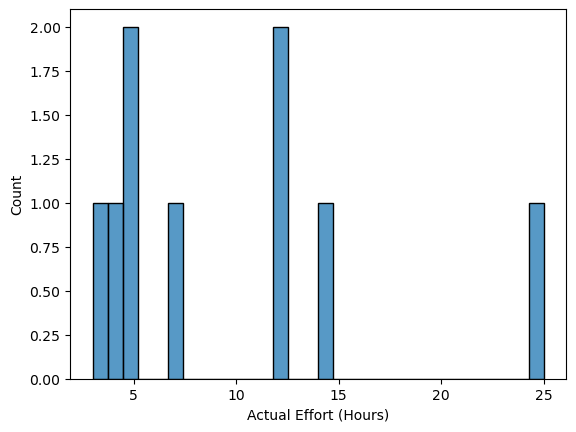

In [26]:
import seaborn as sns
sns.histplot(df['Actual Effort (Hours)'], bins=30)

<Axes: >

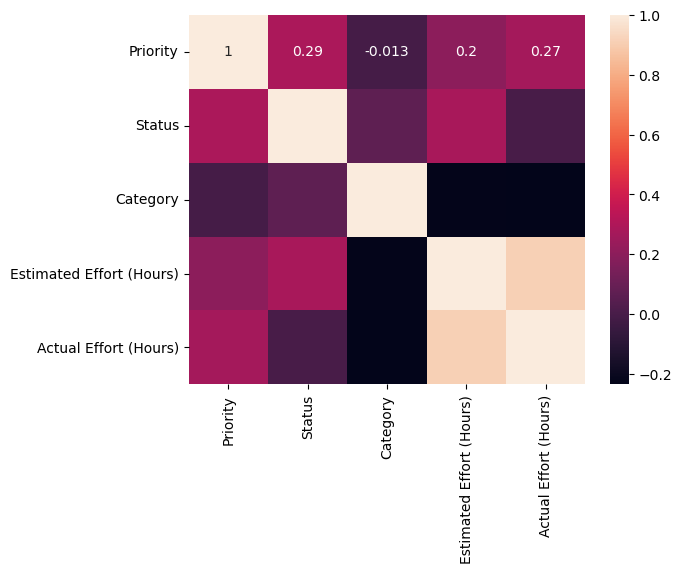

In [27]:
import seaborn as sns

df_corr = features.copy()
df_corr['Actual Effort (Hours)'] = target
sns.heatmap(df_corr.corr(), annot=True)